## Network Visualization in Python

- Helper notebook for article of same name published on Medium.

### Import

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


### Load and process data

In [7]:
# load data
df = pd.read_csv( "data/book1.csv" )
# pick only important weights (hard threshold)
df = df.loc[ df[ 'weight' ] > 10, : ]
df

,Source,Target,Type,weight,book
8,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,Undirected,13,1
9,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1
16,Aerys-II-Targaryen,Robert-Baratheon,Undirected,12,1
17,Aggo,Daenerys-Targaryen,Undirected,11,1
30,Alliser-Thorne,Jon-Snow,Undirected,32,1
...,...,...,...,...,...
658,Sandor-Clegane,Sansa-Stark,Undirected,23,1
664,Shae,Tyrion-Lannister,Undirected,12,1
666,Shagga,Tyrion-Lannister,Undirected,17,1
676,Tyrion-Lannister,Tywin-Lannister,Undirected,40,1


In [8]:
# import
import networkx as nx

# load pandas df as networkx graph
G = nx.from_pandas_edgelist( df,
                             source='Source',
                             target='Target',
                             edge_attr='weight' )
print( "No of unique characters:", len( G.nodes ) )
print( "No of connections:", len( G.edges ) )


No of unique characters: 80
No of connections: 175


## Option 1: NetworkX

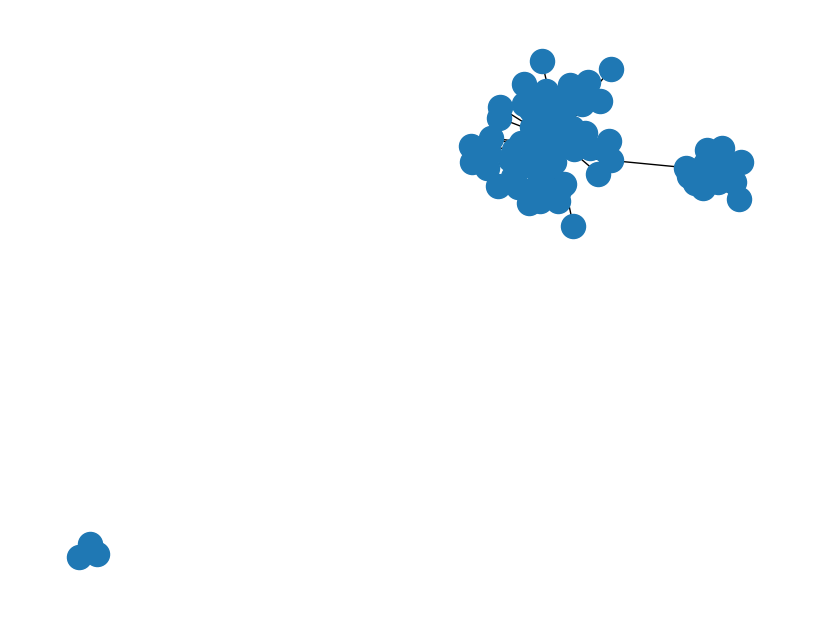

In [9]:
# all graph options
graphs_viz_options = [ nx.draw, nx.draw_networkx, nx.draw_circular, nx.draw_kamada_kawai, nx.draw_random, nx.draw_shell,
                       nx.draw_spring ]

# plot graph option
selected_graph_option = 0

# plot
plt.figure( figsize=(8, 6), dpi=100 )
graphs_viz_options[ selected_graph_option ]( G )

## Option 2: PyVis

In [11]:
# import pyvis
from pyvis.network import Network

# create vis network
net = Network( notebook=True, width=1000, height=600 )
# load the networkx graph
net.from_nx( G )
# show
net.show( "example.html" )

## Option 3: Visdcc in Dash

- See `dash_app.py` file for the demo.

### Extra - get all draw functions in NetworkX

In [12]:
from inspect import getmembers

for x in getmembers( nx ):
    if 'draw' in x[ 0 ]:
        print( x )

('draw', <function draw at 0x120531c10>)
('draw_circular', <function draw_circular at 0x120531f70>)
('draw_kamada_kawai', <function draw_kamada_kawai at 0x12053e040>)
('draw_networkx', <function draw_networkx at 0x120531ca0>)
('draw_networkx_edge_labels', <function draw_networkx_edge_labels at 0x120531ee0>)
('draw_networkx_edges', <function draw_networkx_edges at 0x120531dc0>)
('draw_networkx_labels', <function draw_networkx_labels at 0x120531e50>)
('draw_networkx_nodes', <function draw_networkx_nodes at 0x120531d30>)
('draw_planar', <function draw_planar at 0x12053e310>)
('draw_random', <function draw_random at 0x12053e0d0>)
('draw_shell', <function draw_shell at 0x12053e280>)
('draw_spectral', <function draw_spectral at 0x12053e160>)
('draw_spring', <function draw_spring at 0x12053e1f0>)
('drawing', <module 'networkx.drawing' from '/Users/thomastiotto/mambaforge/envs/brian/lib/python3.8/site-packages/networkx/drawing/__init__.py'>)
('planar_drawing', <module 'networkx.algorithms.plan

In [13]:
# import
from jaal import Jaal
from jaal.datasets import load_got

# load the data
edge_df, node_df = load_got()
print( edge_df )
# add edge labels
edge_df.loc[ :, 'label' ] = edge_df.loc[ :, 'weight' ].astype( str )
# init Jaal and run server
Jaal( edge_df, node_df ).plot( directed=True )

                                from                  to  weight strength
0    Aemon-Targaryen-(Maester-Aemon)        Jeor-Mormont      13   medium
1    Aemon-Targaryen-(Maester-Aemon)            Jon-Snow      34   medium
2                 Aerys-II-Targaryen    Robert-Baratheon      12   medium
3                               Aggo  Daenerys-Targaryen      11   medium
4                     Alliser-Thorne            Jon-Snow      32   medium
..                               ...                 ...     ...      ...
170                   Sandor-Clegane         Sansa-Stark      23   medium
171                             Shae    Tyrion-Lannister      12   medium
172                           Shagga    Tyrion-Lannister      17   medium
173                 Tyrion-Lannister     Tywin-Lannister      40   medium
174                     Waymar-Royce     Will-(prologue)      18   medium

[175 rows x 4 columns]
Parsing the data...Done
Dash is running on http://127.0.0.1:8050/

 * Serving Flask app 

/Users/thomastiotto/mambaforge/envs/brian/lib/python3.8/site-packages/dash_bootstrap_components/_table.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
